<a href="https://colab.research.google.com/github/trailrun/ML_books/blob/main/n533_DFS%26BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **n533. DFS & BFS**

🏆 **학습 목표**
- **깊이 우선 탐색(depth-first search, DFS)**을 배우고 DFS 코드를 이해한다.
- **너비 우선 탐색(breadth-first search, BFS)**을 배우고 BFS 코드를 이해한다.
- 위의 개념과 기존에 배웠던 기본적인 **스택, 재귀, 트리, 그래프** 등을 연관지어 이해한다.
- section5 전체의 최종목적은 자료구조와 알고리즘을 이해하며 프로그래밍하는 것이다.
- section5의 핵심 키워드 : 문제해결과 컴퓨팅 사고력

🧷 가져갈 키워드
- BFS
- DFS

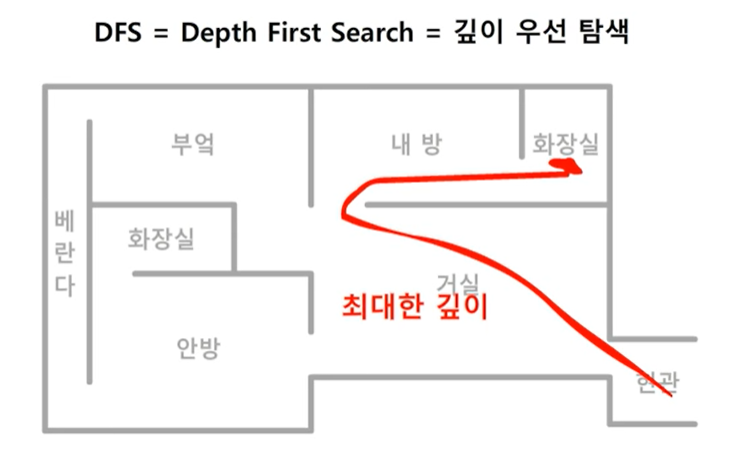

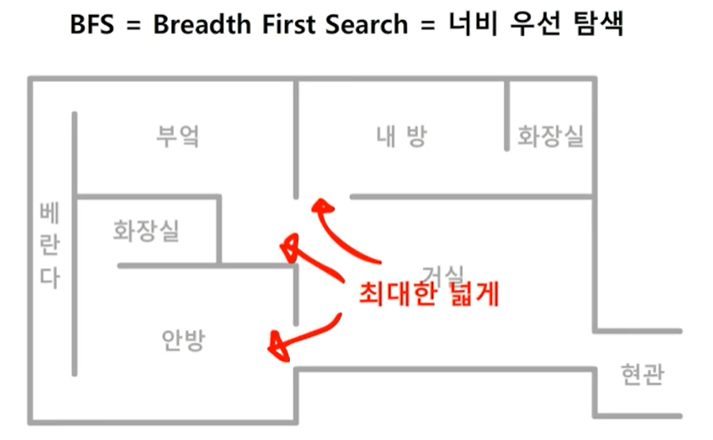

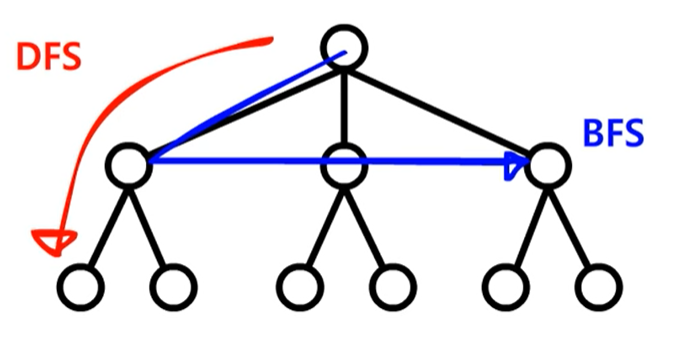

**BFS와 DFS** : 순회(방문)하면서 탐색하는 **탐색 알고리즘**
  - 단, **출발지 노드**와 **그래프/트리 구조**에 따라 탐색하는 순서와 노드가 달라질 수 있다.

# **BFS(breadth-first search) - 너비우선탐색**


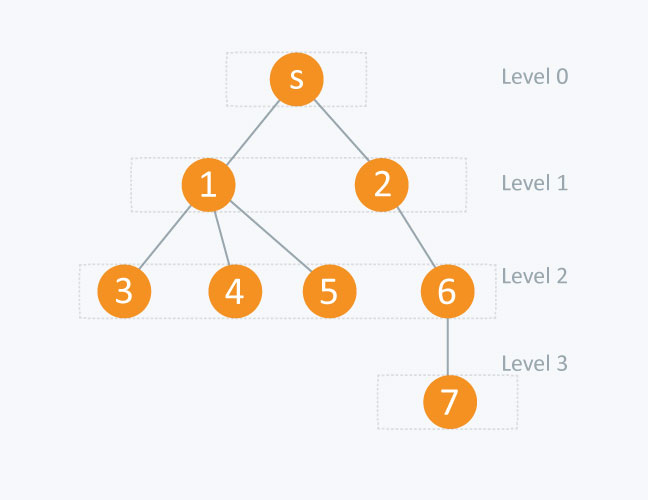

- **가까운 노드부터 우선적으로 탐색하는 알고리즘**
- **큐(queue)** 자료구조 이용
  - FIFO, 선입선출 : S->1->2->3->4->5->6->7
  - BFS는 **`deque`** 라이브러리를 사용하는 것이 좋으며 탐색을 수행함에 있어  $O(N)$ 의 시간이 소요된다.
  > *deque : double-ended queue*
    - 양방향에서 데이터를 처리할 수 있는 queue형 자료구조
    - 메소드
      - `append()`
      - `appendleft()`
      - `extend(iterable)`
      - `extendleft(iterable)`
      - `pop()`
      - `popleft()`
      - `rotate(n)`
        - n의 값이 음수(negative)면 왼쪽으로 회전하고, 양수면 오른쪽으로 회전
  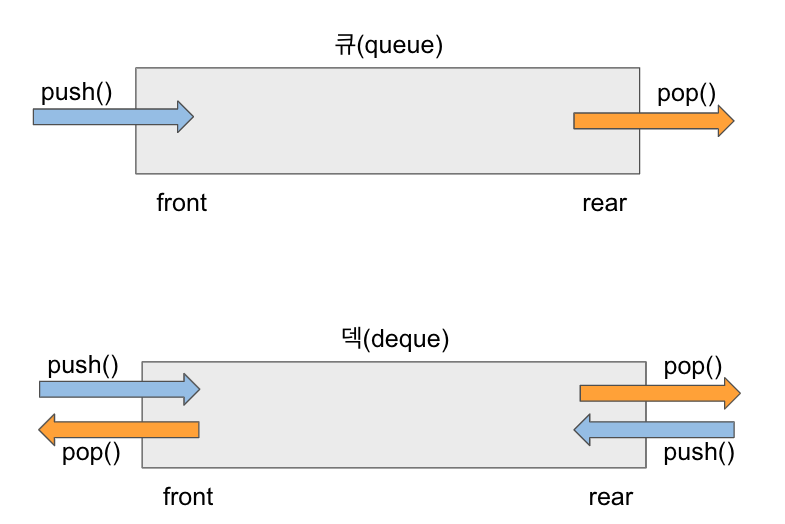


  >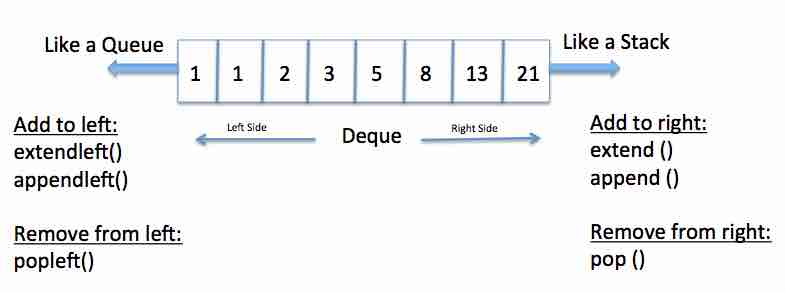

In [ ]:
# 우선 deque를 위해 자료구조의 큐에서 배웠던 내용을 복습한다.

from collections import deque
queue = deque(["Eric", "John", "Michael"])
queue.append("Terry")        # append : 오른쪽끝 삽입
queue.append("Graham")
#print(queue.pop())
print(queue.popleft())       # popleft : 왼쪽끝 빼오기

#print(queue.popleft())

print(queue)

Eric
deque(['John', 'Michael', 'Terry', 'Graham'])


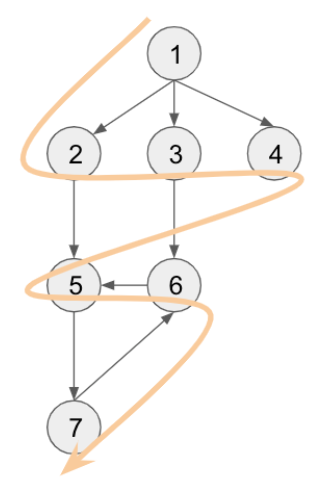

In [ ]:
# 큐를 이용하여 BFS의 개념을 구현해본다.
from collections import deque

# 그래프를 인접리스트로 표현
bfs_graph = {
    1: [2,3,4],
    2: [1,5,6],
    3: [1,6],
    4: [1],
    5: [6,7],
    6: [5],
    7: [6],
}

def bfs_queue(start_node):
  bfs_list = [start_node]
  queue = [start_node]
  while queue:#외부반복문
    node = queue.pop(0)
    for i in bfs_graph[node]: #내부반복문
      ##### 내부반복문에 대한 로직을 작성해보세요 #####

  return bfs_list

bfs_queue(2)
# 1차 : 그래프 연결관계 2차 : edge 연결부분

- 동작과정
  1. 탐색 시작 노드를 큐에 삽입 후 방문 처리
  2. 큐에서 노드를 꺼낸 뒤 해당 노드의 인접 노드 중 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리
  3. 2번의 과정을 수행할 수 없을 때까지 반복
- 활용
  - 길 찾기, 라우팅
  - BitTorrent와 같은 P2P 네트워크에서 인접 노드 찾기
  - 웹 크롤러
  - 소셜 네트워크에서 멀리 떨어진 사람 찾기
  - 그래프에서 주변 위치 찾기
  - 네트워크에서 방송
  - 그래프에서 주기 감지
  - 연결된 구성 요소 찾기
  - 몇 가지 이론적 그래프 문제 풀기

> BFS가 재귀호출을 활용하지 않는 이유
- BFS(너비우선탐색)는 노드가 적은 경우 **최단경로를 탐색**할 때 유용
- **큐를 활용**하므로 노드가 많아지는 경우 **메모리 저장공간이 증가**하는 단점이 있다.
- **인접한 노드에 대해 먼저 탐색**을 하기 때문에 재귀적으로 재호출할 필요가 없다.

In [ ]:
# BFS 의사코드

BFS(graph, startVert):
    for v of graph.vertexes:
        v.color = white  # 모든 verts(정점 또는 노드)를 방문하지 않은 상태(white)

    startVert.color = gray  # 시작 노드를 gray로 표시
        queue.enqueue(startVert)  # 시작 노드를 큐에 넣는다. = while 루프에 들어가면 첫 번째 vert가 될 것

    while !queue.isEmpty():  # 큐가 비어 있지 않은지 여부 확인
        u = queue[0]  # 큐의 헤드 (S) -> 비어 있지 않으면 큐의 첫 번째 항목(startVert)을 변수에 저장

        # 이웃문을 체크하는 것이 핵심부분
        for v of u.neighbors:
            if v.color == white:  # 방문하지 않았는지(white) 확인
                v.color = gray  # 방문하지 않은 경우 gray로 표시한다.(이웃을 탐색한다는 의미)
                queue.enqueue(v)

        queue.dequeue()  # 탐색한 현재 vert를 대기열에서 빼고(deque)
        u.color = black  # vert를 black으로 표시한다.(방문한 것으로 표시)

# 그래프의 모든 verts를 탐색할 때까지 위의 프로세스를 계속진행

In [ ]:
# 큐를 이용하여 BFS의 개념을 구현해본다.

bfs_graph = {   # 그래프를 인접리스트로 표현
    1: [2,3,4],
    2: [1,5,6],
    3: [1,6],
    4: [1],
    5: [6,7],
    6: [5],
    7: [6],
}

def bfs_queue(start_node):
  bfs_list = [start_node]
  queue = [start_node]
  while queue:#외부반복문
    node = queue.pop(0)  #=> deque(양방향 처리)의 popleft
    for i in bfs_graph[node]: # 내부반복문
      ##### 내부반복문에 대한 로직을 작성해보세요 #####

  return bfs_list

bfs_queue(2)
# 1차 : 그래프 연결관계 2차 : edge 연결부분

In [ ]:
bfs_graph = {
        1: [5],
        2: [1,4],
        3: [5],
        4: [5],
        5: [3]
    }


def bfs_queue(start_node, bfs_graph):

    from collections import deque

    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque([start_node])

    # 방문한 노드
    visited = deque([])

    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 하나의 원소 뽑기
        v = queue.popleft()
        # 뽑은 원소는 visited에 추가
        if v not in visited:
            visited.append(v)
        # 아직 방문하지 않은 원소들을 큐에 삽입
        for i in bfs_graph[v]:
            if i not in visited:  # 방문하지 않았을 경우
                queue.append(i)  # 큐에 삽입


    return list(visited)

bfs_queue(2, bfs_graph)

[2, 1, 4, 5, 3]

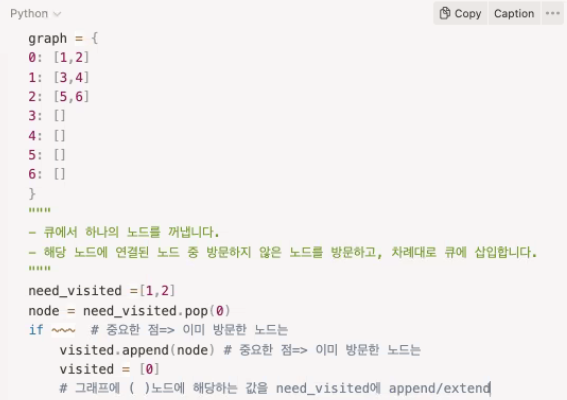

# **DFS(depth-first search) - 깊이우선탐색**

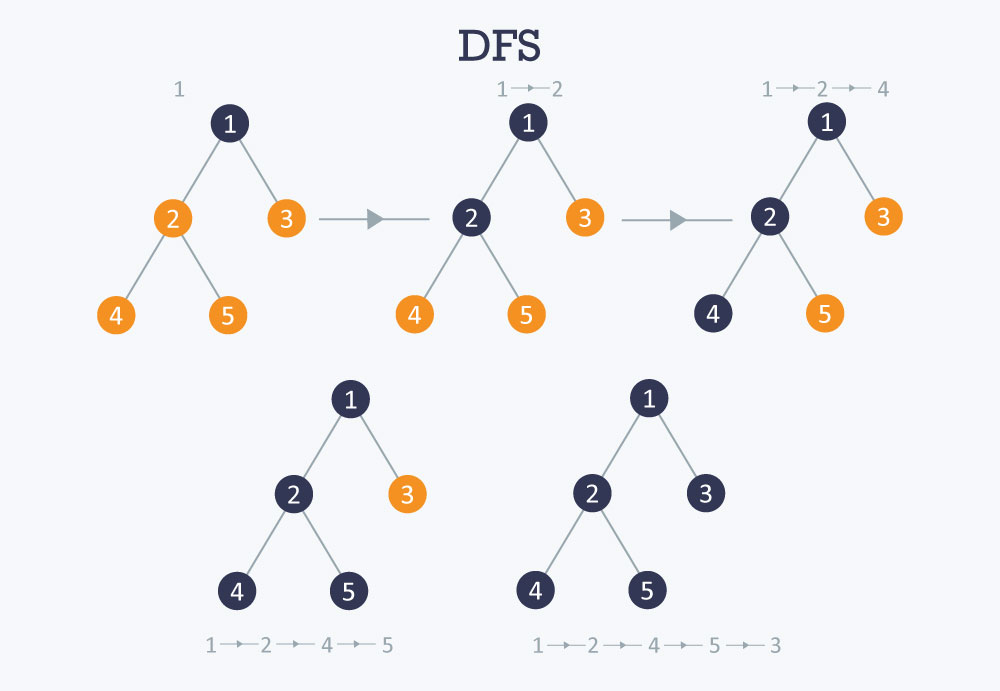

- 그래프에서 **깊은 부분을 우선적으로 탐색하는 알고리즘**
- 그래프의 **모든 노드를 방문**하는 경우 사용
- **스택 자료구조(or 재귀 함수)** 이용 (간단한 구현)
  - LIFO : 1->2->4->5->3
- 다른 경로를 **역추적**하고 탐색하기 전에 가능한 그래프를 **분할**한다.
  - 위 그림에서 1->2->4->5 까지 탐색을 진행하고, 분할이 진행된 후 3을 탐색한다.
  > backtracking
    - DFS에서 활용되는 방법
    - 노드가 있을만한 곳을 되돌아가서 모두 살펴본다는 개념
    - DFS는 깊이우선적으로 탐색을 진행하고, **재귀적으로 아래에서부터 탐색하지 않은 정점이 있는지 확인하는 방법**
-  최단 경로를 찾지 못하고, 시간이 오래 걸릴 수 있다.
- 동작 과정
  1. 탐색 시작 노드를 스택에 삽입 후 방문 처리
  2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면 그 노드를 스택에 넣고 방문 처리. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼낸다.
  3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복

- 활용
  - 가중 그래프의 최소 스패닝 트리 찾기
  - 길 찾기
  - 그래프에서주기 감지
  - 미로 문제
- 시간 복잡도 : $O(N)$

In [ ]:
# DFS 의사코드

DFS(graph):  # 초기상태
    for v of graph.verts:
        v.color = white  # 모든 verts를 방문하지 않음(white)으로 표시
        v.parent = null  # 각 vert의 부모를 null로 설정

    for v of graph.verts:
        if v.color == white:  # 방문하지 않음(white)으로 표시된
            DFS_visit(v)  # 그래프의 각 vert를 방문

DFS_visit(v):
    v.color = gray  # vert를 gray로 표시하여 시작(탐색 과정에서)

    for neighbor of v.adjacent_nodes:
        if neighbor.color == white:  # 방문하지 않은 모든 노드(인접노드)의 갯수만큼 반복문을 수행
            neighbor.parent = v  #트리, 그래프 -> 부모개념없다
            DFS_visit(neighbor)  ## 역추적 : 재귀적으로 호출

    v.color = black  # 모든 이웃 탐색이 완료되면 vert를 black(방문함)으로 표시

In [ ]:
# 재귀를 활용한 DFS 구현하기

dfs_graph = {   # 그래프를 인접리스트로 표현
    1: [2,3,4],
    2: [5],
    3: [6],
    4: [],
    5: [7],
    6: [5],
    7: [6],
}

def dfs_recur(node, dfs_list=[]):
  dfs_list.append(node)   # 리스트에 인접한 노드를 덧붙이는 형태

  for i in dfs_graph[node]:   # 노드의 인접한 노드를 기준으로 반복한다.
    ##### 재귀개념에 대한 로직을 작성해보세요 #####
  return dfs_list

dfs_recur(2)  # 시작노드

In [ ]:
dfs_graph = {
        1: [2,3,4],
        2: [5],
        3: [6],
        4: [],
        5: [7],
        6: [5],
        7: [6],
    }


def dfs_recur(node, dfs_graph, dfs_list=[]):

    # 리스트에 인접 노드 붙이기 & 방문 노드 기록
    dfs_list.append(node)

    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in dfs_graph[node]:
        if i not in dfs_list:
            dfs_recur(i, dfs_graph, dfs_list)  # 재귀함수

    return(dfs_list)



dfs_recur(2, dfs_graph, dfs_list=[])  # [2, 5, 7, 6]

[2, 5, 7, 6]

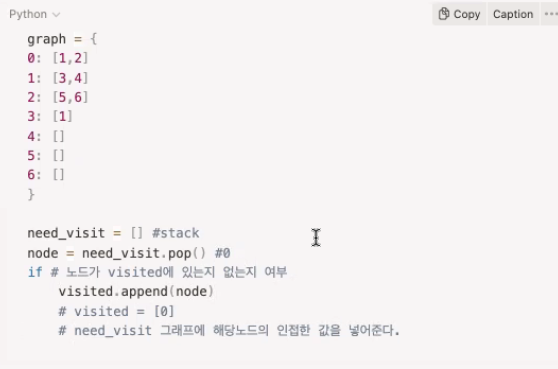

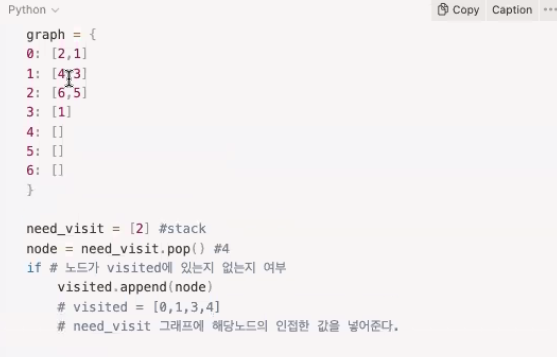

# **BFS vs. DFS**

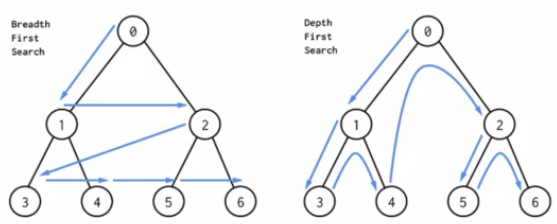

- DFS
  - 장점
    - 찾는 노드의 depth가 깊을수록 빠르다.
    - **메모리를 적게 차지** 한다. (노드 1개의 수준에서만 인접한 노드의 정보를 보관한다. 자신이 탐색하고 있는 라인의 개수만 기억)
  - 단점
    - 노드가 무한한 갯수로 존재하는 경우, **무한반복(무한루프)**에 빠진다.

- BFS
  - 장점
    - **최단경로**를 찾기 적합하다.
    - 찾는 노드가 **인접한** 경우 효과적이다.
  - 단점
    - Queue를 이용해 노드를 저장하기 때문에 **노드의 수가 많을수록 메모리를 많이 소비**한다.

[트리일 경우]

**DFS**
- 노드 1개의 수준에서만 인접한 노드의 정보를 보관한다. 자신이 탐색하고 있는 라인의 개수만 기억
- [0] - [1] - [3]
- 목표로 하는 노드를 찾는데 오래 걸릴 수 있는 단점이 있음

**BFS**
- 자신이 탐색하고 있는 계층에 대한 정보를 큐에 보관
- [0] - [1,2] - [3,4,5,6]
- 계속 보관해야 하는 정보양이 늘어나므로 깊이의 개수만큼 메모리의 개수가 늘어난다.
